In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler

import numpy as np
import pandas as pd

In [4]:
num_workers = 0
batch_size = 20
valid_size = 0.2

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [5]:
train_data = datasets.CIFAR10('data', train=True, transform=transform, download=True)
test_data = datasets.CIFAR10('data', train=False, transform=transform, download=True)

100%|██████████| 170M/170M [00:03<00:00, 48.3MB/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [8]:
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(0.2 * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

In [9]:
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

In [11]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=20, sampler=train_sampler)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=20, sampler=valid_sampler)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=20)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

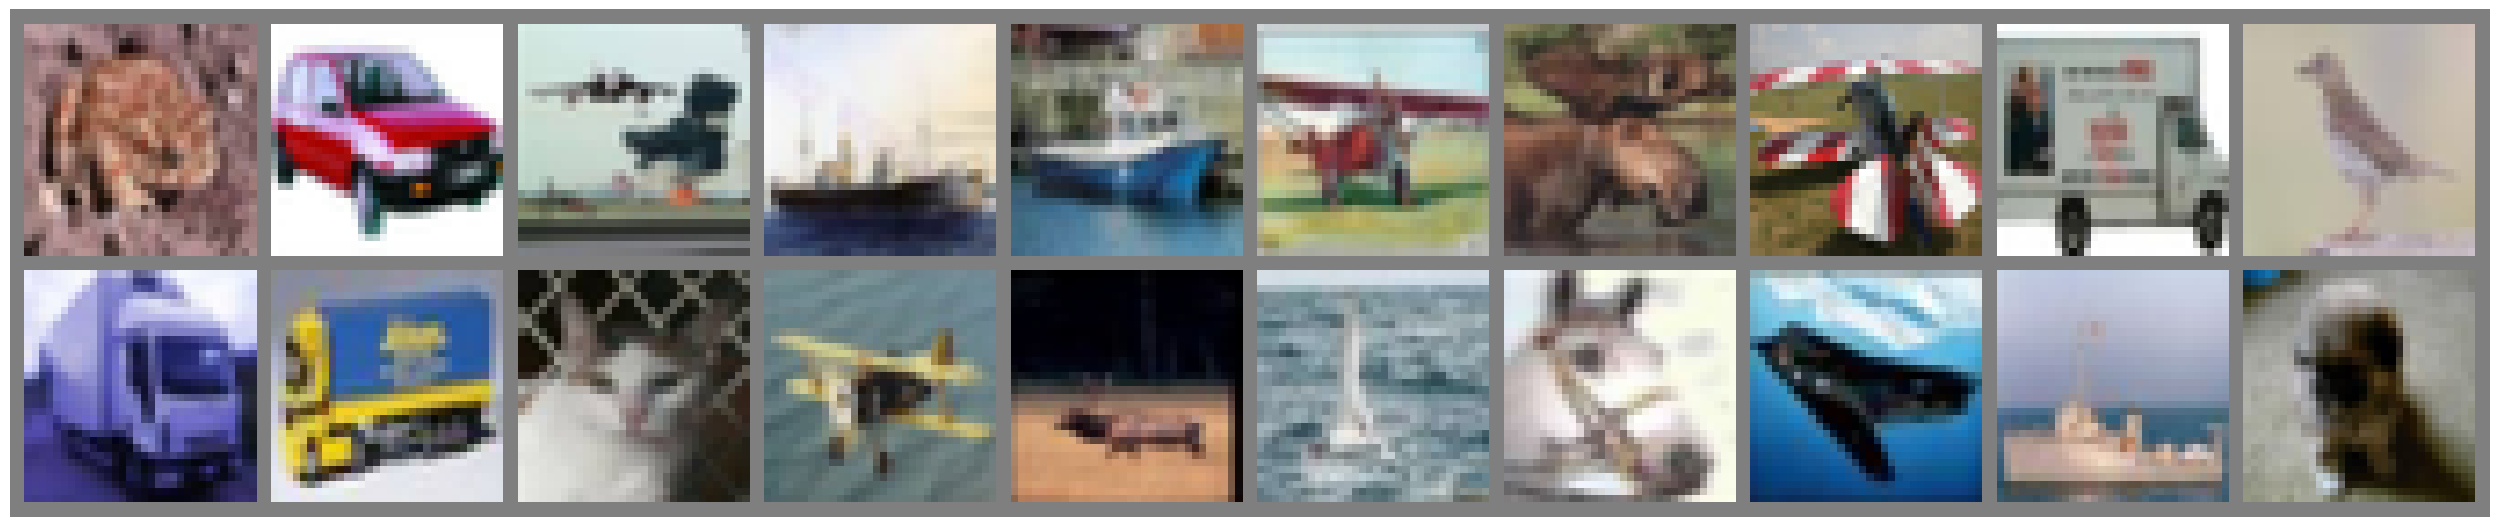

In [12]:
def imshow(image):
    if isinstance(image, torch.Tensor):
        image = image.numpy().transpose((1, 2, 0))
    else:
        image = np.array(image).transpose((1, 2, 0))

    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    image = std * image + mean
    image = np.clip(image, 0, 1)

    fig, ax = plt.subplots(1, 1, figsize=(32, 32))
    plt.imshow(image)
    ax.axis('off')
    plt.show()

# Assuming train_loader is already defined and is a DataLoader object
images, _ = next(iter(train_loader))
out = torchvision.utils.make_grid(images, nrow=10)
imshow(out)

In [13]:
for image , labels in train_loader:
  print(image.shape)
  break

torch.Size([20, 3, 32, 32])


In [33]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=12,kernel_size=3,padding=1,stride=1)
        self.conv2 = nn.Conv2d(12,24,kernel_size=3,stride=1,padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(24*16*16,256)
        self.fc2 = nn.Linear(256,256)
        self.out = nn.Linear(256,10)
        self.drop_out = nn.Dropout()
    def forward(self,X):

        X = self.conv1(X)

        X = self.conv2(X)

        X = self.pool(X)

        X = X.reshape(X.size(0), -1)

        X = self.drop_out(X)

        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        out = self.out(X)
        return X

In [49]:
import torch.nn as nn

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(32 * 8 * 8, 512)  # Adjust based on your input size
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = MyModel()

In [15]:
model=NeuralNetwork()

In [17]:
if torch.cuda.is_available():
    model = model.cuda()

In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [26]:
from re import L

In [51]:
import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = MyModel().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(1, n_epochs + 1):
    train_loss = 0.0
    valid_loss = 0.0

    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)

    model.eval()
    for images, labels in valid_loader:
        images, labels = images.to(device), labels.to(device)

        output = model(images)
        loss = criterion(output, labels)
        valid_loss += loss.item() * images.size(0)

    train_loss = train_loss / len(train_loader.dataset)
    valid_loss = valid_loss / len(valid_loader.dataset)

    print(f'Epoch: {epoch} \tTraining Loss: {train_loss:.6f} \tValidation Loss: {valid_loss:.6f}')

    if valid_loss <= valid_loss_min:
        print(f'Validation loss decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}). Saving model...')
        torch.save(model.state_dict(), 'model.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 1.491867 	Validation Loss: 0.312859
Validation loss decreased (inf --> 0.312859). Saving model...
Epoch: 2 	Training Loss: 1.153366 	Validation Loss: 0.270589
Validation loss decreased (0.312859 --> 0.270589). Saving model...
Epoch: 3 	Training Loss: 1.017966 	Validation Loss: 0.243675
Validation loss decreased (0.270589 --> 0.243675). Saving model...
